# Transformada Rápida de Fourier

Vamos iniciar relembrando que a Transformada Discreta de Fourier (DFT) é uma representação **discreta** do espectro de frequências de sinais no tempo discreto $x(n)$, cuja expressão é dada por:

$$X[k] = \sum\limits_{n=0}^{N-1}x(n)W_N^{kn},$$ sendo $W_N = e^{-j\frac{2\pi}{N}}$

e para calcular cada valor $X[k]$ são necessários
1. $N$ multiplicações complexas, e
2. $N-1$ adições complexas.


Para obter todos os coeficientes $X[k]$, $k = 0, ..., N-1$ são necessários
1. $N^2$ multiplicações complexas, e
2. $(N-1)N$ adições complexas.

Por isso dizemos que a DFT tem complexidade $O(N^2)$.

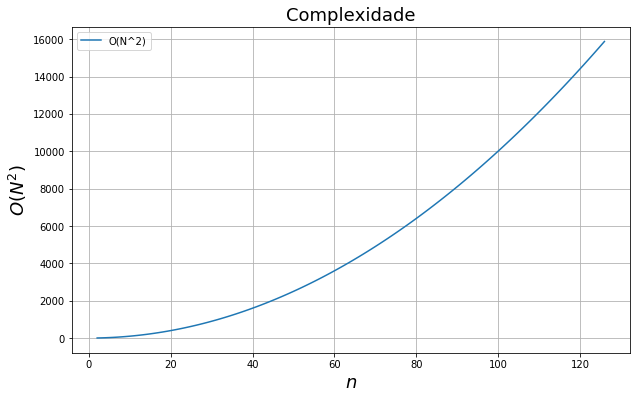

In [9]:
import numpy as np
import matplotlib.pyplot as plt

N = 128;
n = range(2,N-1)

fig,ax=plt.subplots()
fig.set_size_inches((10,6))
                  
ax.plot(n, np.power(n,2),label='O(N^2)')
ax.set_xlabel('$n$',fontsize=18)
ax.set_ylabel(r'$O(N^2)$',fontsize=18)
ax.set_title('Complexidade',fontsize=18)
ax.grid()
ax.legend(loc=0);
ax.legend(loc=0);


Em 1965, é proposto um algoritmo rápido que reduz a complexidade do cálculo da DFT para $O(N.log_2 N)$.

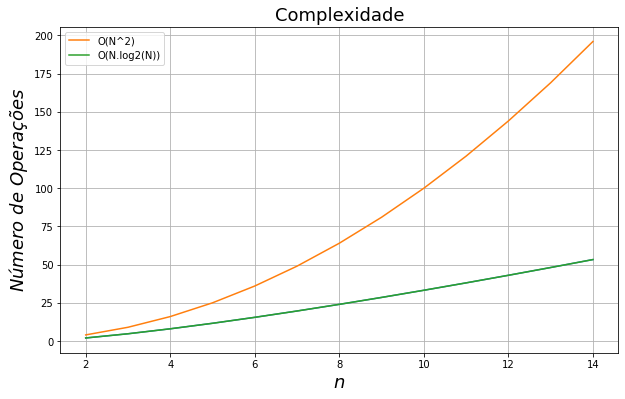

In [17]:
import numpy as np

import matplotlib.pyplot as plt

N = 16;
n = range(2,N-1)

fig,ax=plt.subplots()
fig.set_size_inches((10,6))

plt.plot(n, n*np.log2(n))

ax.plot(n, np.power(n,2),label='O(N^2)')
ax.plot(n, n*np.log2(n), label='O(N.log2(N))')
ax.set_xlabel('$n$',fontsize=18)
ax.set_ylabel(r'$Número\ de\ Operações$',fontsize=18)
ax.set_title('Complexidade',fontsize=18)
ax.grid()
ax.legend(loc=0);
ax.legend(loc=0);

Esses algoritmos ficaram conhecidos como **Transformada Rápida de Fourier**, ou simplesmente **FFT** de Fast Fourier Transform.

Os Algoritmos da FFT exploram as seguintes características:

1. Simetria complexa conjugada: $W_N^{k(N-n)} = W_n^{-kn} = (W_N^{kn})^*$, ($()^*$ significa o conjugado complexo), e;
2. Periodicidade em $k$ e $n$: $W_N^{kn} = W_N^{k(N + n)} = W_N^{(k + N)n}$.

E a decomposição de uma DFT de $N$ pontos em DFTs de tamanhos menores.

Classes básicas:
    
1. FFT com decimação no tempo: $x(n)$ é sucessivamente decomposto em sequências menores
2. FFT com decimação em frequência : $X[k]$ é decomposto em sequências menores
    
Algoritmos:
    
1. Goertzel(1958): $O(N^2)$
2. **Cooley-Tukey(1965): Deu origem à decimação no tempo**
3. Sande-Tukey(1966): Deu origem à decimação em frequência


## FFT por Decimação no tempo

Decomposição sucessiva de $x(n)$ em tamanhos menores, e para tanto se convenciona utilizar $N = 2^l$, sendo $l$ um inteiro positivo.

### Algoritmo Raiz de 2 com decimação no tempo

O sinal $x(n)$ de $N$ pontos é dividido em 2 sequências de $N/2$ pontos, uma relativa aos índices **pares** e outra relativa aos índices **impares**, assim

$$X[k] = \sum\limits_{n=0}^{N-1}x(n)W_N^{kn}$$

após a divisão

$$X[k] = \sum\limits_{n\ par}^{N/2-1}x(n)W_N^{kn} + \sum\limits_{n\ ímpar}^{N/2-1}x(n)W_N^{kn}$$

fazendo:
$n = 2r$ para $n$ par, e $n = (2r + 1)$ para $n$ ímpar,

temos

$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)W_N^{k2r} + \sum\limits_{r=0}^{N/2-1}x(2r+1)W_N^{k(2r+1)}$

$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)(W_N^2)^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x(2r+1)(W_N^2)^{k r}$

Como $W_N^2 = W_{N/2}$ temos

$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)(W_{N/2})^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x(2r+1)(W_{N/2})^{k r}$

representando as componentes pares e ímpares de $x(n)$ por

$x_e(n) = x(2n)$, $n = 0, 1, ..., N/2 -1$, e

$x_o(n) = x(2n + 1)$, $n = 0, 1, ..., N/2 -1$

Temos

$X[k] = \sum\limits_{r=0}^{N/2-1}x_e(n)(W_{N/2})^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x_o(n)(W_{N/2})^{k r}$

Vamos chamar:

$X_e[k] = \sum\limits_{r=0}^{N/2-1}x_e(n)(W_{N/2})^{k r}$,e 

$X_o[k] = \sum\limits_{r=0}^{N/2-1}x_o(n)(W_{N/2})^{k r}$

cada uma sendo uma DFT de $N/2$ pontos

e

$X[k] = X_e[k] + W_N^kX_o[k]$

sendo $X_e[k] = X_e[k + N/2]$ e $X_o[k] = X_o[k + N/2]$

###  <center><font color=#0000ff> Para $N = 2$ </font></center>

Temos:

$X[0] = \sum\limits_{n=0}^{1}x(n)W_2^{0} = x(0) + x(1)$

$X[1] = \sum\limits_{n=0}^{1}x(n)W_2^{1} = x(0) - x(1)$

Podemos representar como 

$X[0] = X_e[0] + W_2^0 X_o[0]$

$X[1] = X_e[1] + W_2^1 X_o[1]$

ilustrado na figura a seguir.

![title](img/FFTN2.png)

###  <center><font color=#0000ff>Para $N = 4$ </font></center>

Usando e FFT temos 

$X[0] = X_e[0] + W_4^0 X_o[0] $ 

$X[1] = X_e[1] + W_4^1 X_o[1]$ 

$X[2] = X_e[2] + W_4^2 X_o[2] = X_e[0] + W_4^2 X_o[0]$      <font color = "0000ff"> Devido a simetria X[k + N/2] = X[k]$</font>

$X[2] = X_e[3] + W_4^3 X_o[3] = X_e[1] + W_4^2 X_o[1]$       <font color = "0000ff"> Devido a simetria X[k + N/2] = X[k]$</font>

![title](img/TrelicaFFTN4.png)

Observando as duas estruturas acima, vemos que para uma FFT de tamanho $N$, são necessários $\log_2(N)$ estágios, e em cada estágio, a partir dos valores do sinal, são realizadas DFTs de tamanhos $2, 4, 8, ..., N$.

Para o primeiro estágio, FFT de tamanho $N_1 = 2$, para calcular $X_e[k]$ $k = 0, 1$ usa-se as posições de entrada 0 (quen contém $x(0)$) e 1 (que contém $x(2)$), já $X_o[k]$ usa as posições 2 (que contém $x(1)$) e 3 (que contém $x(3)$), houve um deslocamento de $N_1/2$ na posições de entrada.

No segundo estágio, FFTs de tamanho $N_2 = 4$ e nesse caso já o resultado da FFT, $X[k],\ k = 0,1 2,3$ para cada $k$, envolve as **posições anteriores** $k$ e $(k+ N_2/2)\ mod\ N_2$

Pelo cálculo da DFT temos:

$X[0] = \sum\limits_{n=0}^{3}x(n)W_4^{0} = x(0) + x(1) + x(2) + x(3) = x(0) + x(2) + x(1) + x(3)$

$X[1] = \sum\limits_{n=0}^{3}x(n)W_4^{n} = x(0) + x(1)W_4^{1}  + x(2)W_4^{2} + x(3)W_4^{3} =  
x(0) - x(2) -j[x(1) - x(3)]$

$X[2] = \sum\limits_{n=0}^{3}x(n)W_4^{2n} = x(0) + x(1)W_4^{2} + x(2W_4^{4}) + x(3)W_4^{6} = x(0) + x(2) -[x(1) + x(3)]$

$X[3] = \sum\limits_{n=0}^{3}x(n)W_4^{3n} = x(0) + x(1)W_4^{3} + x(2)W_4^{6} + x(3)W_4^{9} = x(0) - x(2) + j[x(1) - x(3)]$

###  <center><font color=#0000ff>  N = 8 </font></center>

Para $N = 8$ vamos usar a borboleta otimizada mostrada na Figura abaixo (Fig. 9.12, pp.431 Livro Discrete Time Sianl Processing. Oppenheim.)

Sendo 

$X_m[p] = X_{m-1}[p] + W_N^rX_{m-1}[q]$

$X_m[q] = X_{m-1}[p] - W_N^r X_{m-1}[q]$

Precisamos avaliar como variam $m$, $p$, $q$ e $r$. Inicialmente, vamos atribuir os valore do sinal $x(n)$ ao estágio inicial da treliça, usando a sequência obtida pela inversão da ordem dos bits dos índices de $x(n)$, ou seja:

$X_0[0] = x(0)$

$X_0[1] = x(4)$

$X_0[2] = x(2)$

$X_0[3] = x(6)$

$X_0[4] = x(1)$

$X_0[5] = x(5)$

$X_0[6] = x(3)$

$X_0[7] = x(7)$

e representar a treliça, que tem $log_2(N)$ estágios, para $N = 8$ teremos 3 estágios, que estão representados a seguir.

![title](img/FFTN8peq.png)

Repetindo a treliça apresentando somente os valore de $p$ e $q$ em cada estágio.

**Questão:** Como implementar um código para um $N$ qualquer?

In [18]:
import numpy as np
#PRÉ-DEFINIÇÕES:
N = 8                                   # Tamanho da FFT
x = [1,1,1,1,1,1,1,1]                   # Entrada da FFT 

print('Sinal de Entrada')
print(x)

etapas = np.arange(0,int(np.log2(N))) # Etapas necessárias para FFT

# Função que calcula o bit reverso:
def revbits(x):
    return int(bin(x)[2:].zfill(len(etapas))[::-1], 2)

XM = np.zeros(N)
#Definição da sequência do vetor de entradas para FFT:
for k in range(N):
  XM[k] = x[revbits(k)]

N1 = 2
ri=0


Xant = XM
X_k = np.zeros(N)

# Implementação dos estágio em borboletas
for m in range(0,int(np.log2(N))):
    p = 0
    q = N1/2
    qtde = N/N1
    
    for i in range(0,int(qtde)):
        rp = p;
        rq = q;
        ra = 0;
        
        for r in range(0,int(N1/2)):
            X_k[int(rp)] = Xant[int(rp)] + np.exp(-1j*2*np.pi*r/N)*Xant[int(rq)] 
            X_k[int(rq)] = Xant[int(rp)] - np.exp(-1j*2*np.pi*r/N)*Xant[int(rq)]
            Xant[int(rp)] = X_k[int(rp)]
            Xant[int(rq)] = X_k[int(rq)]            
            rp = rp + 1
            rq = rq + 1
        p = p + N1;
        q = q + N1; 
    N1 = 2*N1

print('FFT')
print(X_k)

Sinal de Entrada
[1, 1, 1, 1, 1, 1, 1, 1]
FFT
[8. 0. 0. 0. 0. 0. 0. 0.]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


Até este momento, para um usuário de alto nível da FFT o único parâmetro que deve ser configurado é $N$, o tamanho da FFT.

![title](img/FFTAltoNivel1.png)

Vamos observar como analisar as componentes de frequências de um sinal $x(n)$ usando a sua DFT $X[k]$. Para tanto, devemos lembrar que a DFT de tamanho $N$ é realizada tomando amostras igualmente espaçadas de $\frac{2\pi}{N}$ da transformada de Fourier no Tempo discreto $X(e^{j\omega})$.

É sabido da literatura que a quantiade de amostras $N$ (ou tamanho da DFT) para um sinal limitado com $L$ posições deve ser $N \geq L$, e caso o sinal não tenha tamanho finito ou seja muito longo, devemos tratá-lo em blocos, e tratar as interações entre os blocos.

O fato de lidarmos com um sinal limitado no tempo traz um efeito conhecido com vazamento (leakage). Uma forma de analisar esse fato é considerar que um sinal $x(n)$ com $N$ posições, pode ser visto como a multiplicação de um sinal $x_o(n)$ por uma sinal limitador, denominado de janela $w(n)$ de $N$ posições, assim $x(n) = x_o(n)w(n)$. Aplicando a Transformada de Fourier temos
$$ X(k) = X_o(k)*W(k).$$

Por exemplo, se a janela for quadrada
$$ w(n) = \left\{\begin{matrix}1,\ 0 \leq n <N \\ 0,\ caso\ contrário\end{matrix}\right.$$ sua Transformada de Fourier é uma $sinc$, como representado a seguir.

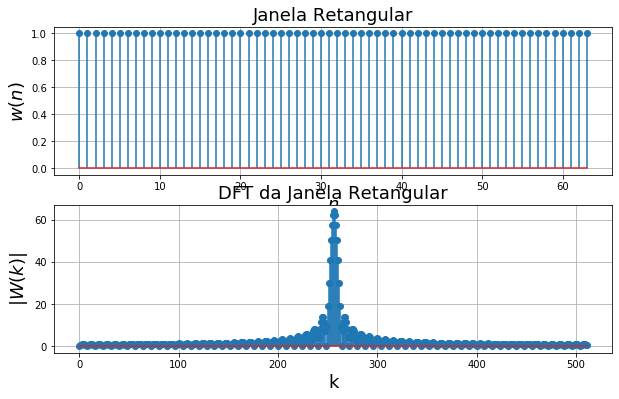

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 64 #Tamanho da janela

wn = np.ones(L)

WN = scp.fft(wn,512)

# Faz um deslocamento nas frequências
WN_shifted = np.fft.fftshift(WN)

fig,ax=plt.subplots(2)
fig.set_size_inches((10,6))
eixo_x = np.linspace(-np.pi,np.pi,512)
                  
ax[0].stem(wn,use_line_collection=True)
ax[0].set_xlabel('$n$',fontsize=18)
ax[0].set_ylabel(r'$w(n)$',fontsize=18)
ax[0].set_title('Janela Retangular',fontsize=18)
ax[0].grid()

ax[1].stem(abs(WN_shifted),use_line_collection=True)
ax[1].set_xlabel('k',fontsize=18)
ax[1].set_ylabel(r'$|W(k)|$',fontsize=18)
ax[1].set_title('DFT da Janela Retangular',fontsize=18)
ax[1].grid()


Sendo assim, ao calcular a FFT de $N$ pontos de um sinal, obteremos os pontos de um sinal janelado. Por exemplo, vejamos o que acontece quando calulamos a FFT de um cosseno limitado em $N$ pontos.

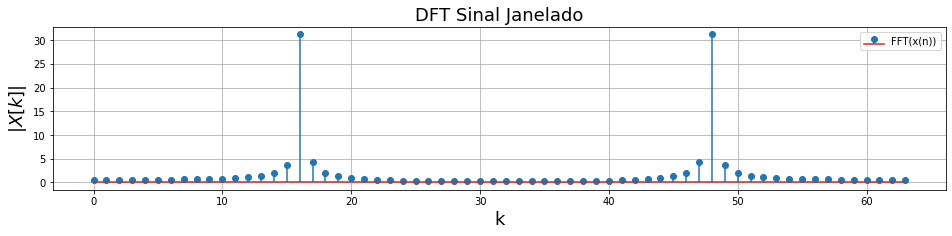

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 64 # Quantidade de pontos no sinal
N = 64 # Tamanho da DFT

fig,ax=plt.subplots()
fig.set_size_inches((16,3))

n = np.arange(0,L)

xn = np.cos(4.7*n)

#Descomentar se quiser fazer a comparação com a janela quadrada
Xk = scp.fft(xn,N)    

ax.stem(abs(Xk),label='FFT(x(n))',use_line_collection=True,)
ax.set_xlabel('k',fontsize=18)
ax.set_ylabel(r'$|X[k]|$',fontsize=18)
ax.set_title('DFT Sinal Janelado',fontsize=18)
ax.grid()
#Descomentar se quiser fazer a comparação com a janel quadrada
ax.legend(loc=0);

Para controlar o efeito do vazamento pode-se aumentar o tamanho da janela $L$, ou utilizar uma função $w(n)$ cujas componentes em frequências tem outra distribuição. Como exemplo, considere a Janela de Hanning:
$$ w(n) = \left\{\begin{matrix} 0,5 - 0,5\cos(\frac{2\pi n}{N-1}),& 0 \leq n < N \\ 0 & caso\ contrário.\end{matrix}\right.$$
representada a seguir.

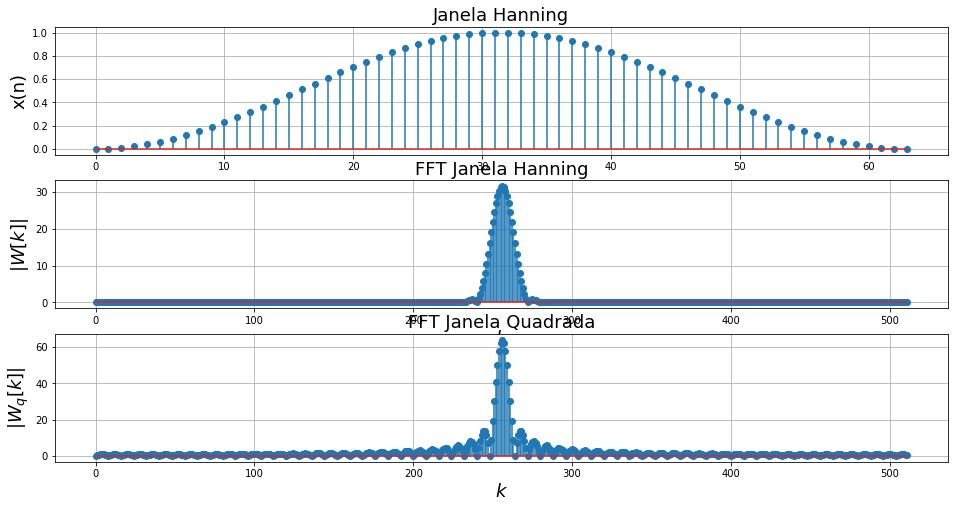

In [29]:
import numpy as np
import matplotlib.pyplot as plt

L = 64 # Tamanho da Janela

fig,ax=plt.subplots(3)
fig.set_size_inches((16,8))

n = np.arange(0,L)

wn = 0.5 - 0.5*np.cos(2*np.pi*n/(L-1))

WN = scp.fft(wn,512)

# Faz um deslocamento nas frequências
WN_shifted = np.fft.fftshift(WN)
eixo_x = np.linspace(-np.pi,np.pi,512)

ax[0].stem(wn,label='DFT(x(n))',use_line_collection=True,)
ax[0].set_xlabel('n',fontsize=18)
ax[0].set_ylabel('x(n)',fontsize=18)
ax[0].set_title('Janela Hanning',fontsize=18)
ax[0].grid()
ax[1].stem(abs(WN_shifted),label='FFT(x(n))',use_line_collection=True)
ax[1].set_xlabel('$k$',fontsize=18)
ax[1].set_ylabel('$|W[k]$|',fontsize=18)
ax[1].set_title('FFT Janela Hanning',fontsize=18)
ax[1].grid()

w_q = np.ones(L)
W_q = scp.fft(w_q, 512)
W_q_shifted = np.fft.fftshift(W_q)
ax[2].stem(abs(W_q_shifted),label='FFT(x(n))',use_line_collection=True)
ax[2].set_xlabel('$k$',fontsize=18)
ax[2].set_ylabel('$|W_q[k]$|',fontsize=18)
ax[2].set_title('FFT Janela Quadrada',fontsize=18)
ax[2].grid()


Aplicando o janelamento ao cosseno obtemos:

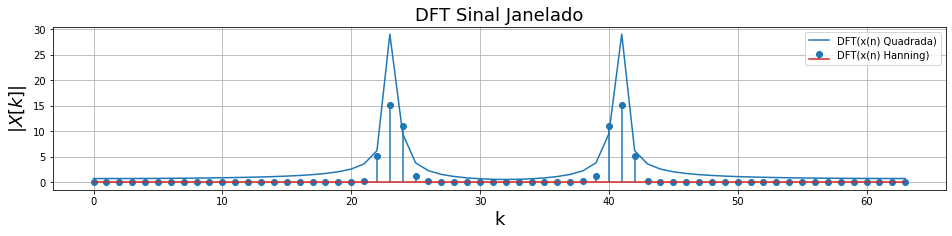

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 64 # Quantidade de pontos no sinal
N = 64 # Tamanho da DFT

fig,ax=plt.subplots()
fig.set_size_inches((16,3))

n = np.arange(0,L)

wn = 0.5 - 0.5*np.cos(2*np.pi*n/(L-1))

xn = np.cos(4*n)

#Descomentar se quiser fazer a comparação com a janela quadrada
Xquadrada = scp.fft(xn,N)    

xnj = xn*wn   #*(0.5 - 0.5*np.cos(2*np.pi*n/(L-1))
                  
Xomega = scp.fft(xnj, N)

ax.stem(abs(Xomega),label='DFT(x(n) Hanning)',use_line_collection=True,)
ax.set_xlabel('k',fontsize=18)
ax.set_ylabel(r'$|X[k]|$',fontsize=18)
ax.set_title('DFT Sinal Janelado',fontsize=18)
ax.grid()
#A FFT usando a janela quadrada foi interpolada apenas para melhorar a representação.
ax.plot(abs(Xquadrada),label='DFT(x(n) Quadrada)')
ax.legend(loc=0);

Existem outras janelas como as de Hamming, Kaiser, Blackman, etc. O que nos leva a incluir mais um parâmetro quando vamos "especificar" uma FFT, o tipo da janela.

![title](img/FFTAltoNivel2.png)

### <font color="0000ff"> Resolução Espectral</font>


A FFT pode ser vista como um conjunto de $N$ amostras do espectro de frequência $X(e^{j\omega})$ de um sinal $x(n)$, tomadas a intervalos $\omega_k = \frac{2\pi.k}{N}$. 

A sequência $x(n)$ foi obtida pela amostragem de um sinal analógico $x(t)$ a uma frequência de amostragem $F_s$. A conversão da frequência do sinal analógico $f$ para o sinal no tempo discreto $\omega$ é dada por $\omega = \frac{2\pi f}{F_s}$.

Então podemos igualhar a $k$-ésima amostra em frequência obtida pela FFT a componente $f_k$ do sinal analógico, ou seja $$\frac{2\pi f_k}{F_s} = \frac{2\pi.k}{N}$$ então $$f_k = \frac{F_s.k}{N}.$$

Se considerarmos as componentes representadas nos $k$ e $k-$ bins da FFT, temos que a resolução em frequência pode ser calculada por $$\Delta_f = f_{k+1} - f_k = \frac{F_s(k+1)}{N} - \frac{F_s.k}{N}$$ o que nos dá $$\Delta_f = \frac{F_s}{N}.$$

Essa resolução em frequência $\Delta_f$ indica que componentes do sinal analógico com distância menor que esse valor não serão registradas pela FFT. Ou ainda, considerando o efeito do vazemento (leakage) quais componentes de frequência irão influenciar umas nas outras. 

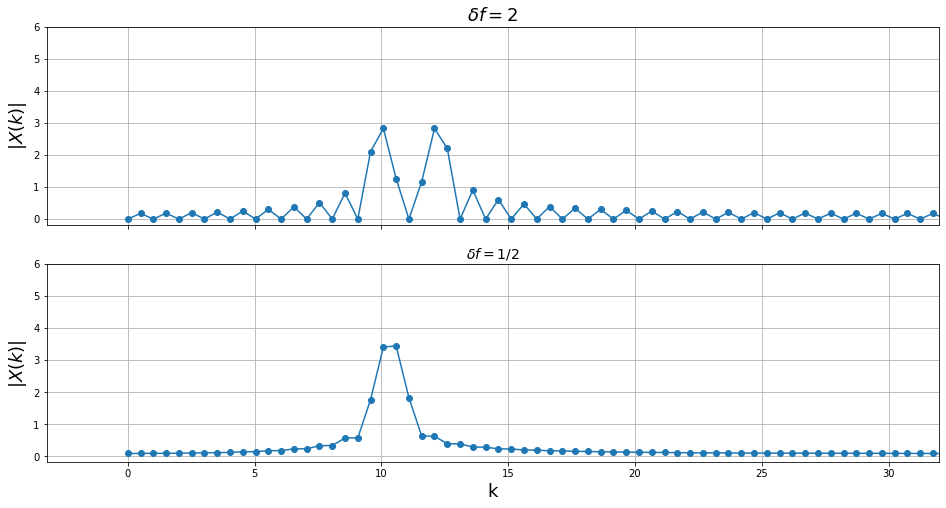

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

Nf = 128 # Tamanho da FFT
fs = 64 # Freqência de Amosrtagem
f = 10  # Frequência do sinal
t = np.arange(0,1,1/fs) # amostras no tempo discreto
deltaf = 1/2. # Ditância entre as frequências

fig,ax = plt.subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((16,8))

x=np.cos(2*np.pi*f*t) + np.cos(2*np.pi*(f+2)*t) # 2 Hz diferença de frequência
X = scp.fft(x,Nf)/np.sqrt(Nf)
ax[0].plot(np.linspace(0,fs,Nf),abs(X),'-o')
ax[0].set_title(r'$\delta f = 2$',fontsize=18)
ax[0].set_ylabel(r'$|X(k)|$',fontsize=18)
ax[0].grid()

x = np.cos(2*np.pi*f*t) + np.cos(2*np.pi*(f+deltaf)*t) # delta_f de diferença de frequência

X = scp.fft(x,Nf)/np.sqrt(Nf)
ax[1].plot(np.linspace(0,fs,Nf),abs(X),'-o')
ax[1].set_title(r'$\delta f = 1/2$',fontsize=14)
ax[1].set_ylabel(r'$|X(k)|$',fontsize=18)
ax[1].set_xlabel('k',fontsize=18)
ax[1].set_xlim(xmax = fs/2)
ax[1].set_ylim(ymax=6)
ax[1].grid()

## Espectrograma ##

As componentes de frequências de um sinal podem variar com o tempo, e pela sua natureza a FFT não tem capacidade de registar as variações temporais. Para tanto, usa-se uma outra representação em que FFTs são aplicadas em determinados intervalos, e representadas a medida que o tempo passa, como representado na Figura abaixo. 

![title](bingo2.jpeg)

Ao valor do módulo da FFT a cada intervalo é associada um cor, gerando assim um diagrama de calor que pode variar, se houver variações nas componentes de frequência do sinal, com o tempo. Dependendo do contexto esse gráfico pode ser denominado de Espectrograma, Waterfal ou outro nome. 

Podemos agora atualizar o diagrama da especificação da FFT para representar a geração do espectrograma como mostrado na figura a seguir.

![title](img/FFTpEspectrograma.png)

Um exemplo para o sinal $x(n) = \cos(2\pi 125n) + \cos(2\pi 250n)$ está representado na Figura abaixo.

![title](img/Waterfallcossenos.png)

E para um cosseno cuja frequência varia está representado a seguir.

![title](img/Waterfalltons.png)

Aqui, além da reolução espectral da FFT já discutida anteriormente devemos nos atentar para a resolução temporal $\Delta t$, pois mudanças temporais podem não ser capturadas.

Podemos agora modificar o nosso diagrama da especificação de FFT para representar o cálculo do espectrograma.

![title](img/FFTpEspectrograma.png)

## Decimação do sinal de entrada da FFT ##

Partindo do pressuposto que o sinal de entrada é um fluxo de dados obtido com uma frequência de amostragem $F_s$, vamos considerar que fluxo será processado na FFT em blocos de tamanho $N$, e dependendo da taxa de amostragem escolhida pode ser necessário reduzir essa taxa. Um das formas de reduzir a taxa é eliminar um conjunto de amostras guardando as demais. Processo conhecido como decimar o sinal de entrada.

A decimação de tamanho $M$ consiste em guardar as amostradas a cada $M$ intervalos de tempo. Na Figura abaixo tem-se um exemplo de decimação para $M = 3$. O sinal obtido tem taxa de amostragem $Fs/M$.

![title](img/Fig101Lyons.png)
Retirado de: Understanding Digital Signal Processing. Richard Lyons. Third Edition.

Ao realizar a decimação o espectro do sinal se "espalha", ficando $M$ vezes mais largo, e é necesário usar um filtro passa-baixas antes da decimação, e com isso evitar a sobreposição de frequências (aliasing) no sinal decimado. 

![title](img/Decimacao.png)


A relação entre a entrada $x(n)$ e a saída $y(n)$ é dada por $y(n) = \sum_{i=0}^{Ord}x(n)h(i - n)$. Sendo $h(n),\ n = 0,..., Ord -1$ os coeficientes do filtro, e $Ord$ a ordem do filtro. Quqnto maior a ordem do filtro, mais atraso ele impõe ao processamento. A frequência de corte de um filtro define a frequência em que as componentes do sinal de entrada são atenuadas em $3dB$, e banda de passagem a faixa de frequências em que as compoenentes do sinal são atenuadas até o valor especificado. Na figura abaixo esses parâmetros estão representados.

![title](img/FigFPB.png)

Dependendo dos a frequência de corte do filtro e da largura da banda de passagem pode ser necessário um filto de alta ordem, e como quanto maior a ordem do filtro maior o atraso imposto, usa-se uma estrutura conhecida como filtro polifásico (tradução livre de Polyphase), representado a seguir.

![title](img/Fig1012Lions.png)
Retirado de: Understanding Digital Signal Processing. Richard Lyons. Third Edition.

Observe que o filtro polifásico usa os mesmo coeficientes do filtro passa-baixas necessário para as especificações, porém de forma distribuída. Mostra-se que esse estrutura tanto dominui o atraso quando é computacionalmente mais eficiente.

Podemos agora alterar o nosso diagrama de especificação da FFT acresntando um filto polifásico na entrada, que decimará o sinal recebido para a taxa que pode ser processada para o cálculo da FFT.

![title](img/PolyphaseFilterFFTEspectrograma.png)

